In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model

In [83]:
# https://www.kaggle.com/tunguz/deep-solar-dataset
df_all = pd.read_csv('deepsolar_tract.csv', encoding='latin-1')

In [84]:
for col in df_all.columns:
    try:
        pd.to_numeric(df_all[col])
    except:
        print(col)

# df = df_all#.dropna()

county
state
electricity_price_transportation


In [85]:
df_all = df_all.loc[:, ~(df_all.columns).isin(['voting_2012_dem_percentage', 'voting_2012_gop_percentage'])]

In [86]:
# Investigate missing data
df_nans_all = df_all[pd.isnull(df_all).any(axis=1)] # dataframe of missing data after dropping 2012 voting data cols

In [87]:
# shows patter of geo data missing
nans = df_nans_all.isna().sum()
nans.sort_values(ascending = False)[0:20]

earth_temperature                 5802
lat                               5802
cooling_degree_days               5802
heating_degree_days               5802
wind_speed                        5802
atmospheric_pressure              5802
daily_solar_radiation             5802
relative_humidity                 5802
air_temperature                   5802
frost_days                        5802
earth_temperature_amplitude       5802
cooling_design_temperature        5802
heating_design_temperature        5802
lon                               5802
elevation                         5802
housing_unit_median_gross_rent    1976
housing_unit_median_value         1894
mortgage_with_rate                1136
dropout_16_19_inschool_rate       1061
median_household_income            957
dtype: int64

In [88]:
# pull rows that have geo data missing
df_nans = df_nans_all[(df_nans_all['daily_solar_radiation'].isnull())] 

In [89]:
counties = []
states = []
fips = []
perc_nan_of_county = []
perc_nan_landarea_of_county = []
perc_nan_landarea_of_state = []
heating_degree_days = []
cooling_design_temperature= []
cooling_degree_days=[]
earth_temperature = []
wind_speed = []
atmospheric_pressure = []
daily_solar_radiation = []
relative_humidity = []
air_temperature = []
frost_days = []
earth_temperature_amplitude = []
heating_design_temperature = []
elevation = []
lon = []
lat = []
fips_codes = []

# group missing data by state
state_grps = df_nans.groupby('state')

for s_grp in state_grps:
    # group missing data by county
    county_grps = s_grp[1].groupby('county')
    for c_grp in county_grps:
        # threshold: if the land area of the missing tracts represents less than 25% of the county land area, 
        # replace missing value with county average
        if 100*sum(c_grp[1].land_area)/sum(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['land_area'])<20:
            for _fips in c_grp[1].fips:
                fips_codes.append(_fips)
                counties.append(c_grp[0])
                states.append(s_grp[0])
                heating_degree_days.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['heating_degree_days']))
                cooling_design_temperature.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['cooling_design_temperature']))
                cooling_degree_days.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['cooling_degree_days']))        
                earth_temperature.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['earth_temperature'])  )           
                wind_speed.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['wind_speed']))
                atmospheric_pressure.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['atmospheric_pressure']) )
                daily_solar_radiation.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['daily_solar_radiation']))
                relative_humidity.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['relative_humidity']))
                air_temperature.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['air_temperature']))
                frost_days.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['frost_days']))
                earth_temperature_amplitude.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['earth_temperature_amplitude']))
                heating_design_temperature.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['heating_design_temperature']))
                elevation.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['elevation']))
                lon.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['lon']))
                lat.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['lat']))
                   

In [90]:
# make dataframe of imupted data
no_geo_data_df2 = pd.DataFrame({'county':counties, 'state':states,'fips':fips_codes,
                                'heating_degree_days':heating_degree_days,
                                'cooling_design_temperature':cooling_design_temperature,
                                'cooling_degree_days':cooling_degree_days,
                                'earth_temperature':earth_temperature,
                                'wind_speed':wind_speed,
                                'atmospheric_pressure':atmospheric_pressure,
                                'daily_solar_radiation':daily_solar_radiation,
                                'relative_humidity':relative_humidity,
                                'air_temperature':air_temperature,
                                'frost_days':frost_days,
                                'earth_temperature_amplitude':earth_temperature_amplitude,
                                'heating_design_temperature':heating_design_temperature,
                                'elevation':elevation,
                                'lon':lon,
                                'lat':lat
                              })

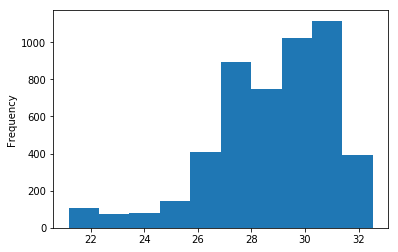

In [74]:
no_geo_data_df2.cooling_design_temperature.plot.hist()

In [91]:
geo_cols = ['air_temperature', 'atmospheric_pressure', 'cooling_degree_days',
       'cooling_design_temperature', 'county', 'daily_solar_radiation',
       'earth_temperature', 'earth_temperature_amplitude', 'elevation',
       'frost_days', 'heating_degree_days', 'heating_design_temperature',
       'lat', 'lon', 'relative_humidity', 'state', 'wind_speed']

In [92]:
# filter by fips and replace nans in main dataframe with imputed values
for fips_cde in no_geo_data_df2.fips:
    df_all.loc[df_all.fips == fips_cde, geo_cols] = no_geo_data_df2.loc[no_geo_data_df2.fips == fips_cde, geo_cols].values

In [93]:
# re-examine nan counts for top 20 features
df_nans2 = df_all[pd.isnull(df).any(axis=1)]
nans2 = df_nans2.isna().sum()
nans2.sort_values(ascending = False)[:20]

housing_unit_median_gross_rent    1976
housing_unit_median_value         1894
earth_temperature                 1395
lon                               1395
cooling_degree_days               1395
heating_degree_days               1395
wind_speed                        1395
atmospheric_pressure              1395
daily_solar_radiation             1395
relative_humidity                 1395
air_temperature                   1395
frost_days                        1395
earth_temperature_amplitude       1395
cooling_design_temperature        1395
heating_design_temperature        1395
elevation                         1395
lat                               1395
mortgage_with_rate                1136
dropout_16_19_inschool_rate       1061
median_household_income            957
dtype: int64

In [95]:
# check geo corrected data
df_geocorrected = df_nans2[(df_nans2['daily_solar_radiation'].isnull())] 

In [96]:
grps = df_geocorrected.groupby('state')

state = []
perc_tracts = []
perc_land = []
total_systems = 0
systems = []
perc_systems = []

for grp in grps:
    state.append(grp[0])
    perc_tracts.append(100*len(grp[1])/len(df_all[df_all.state == grp[0]]) )
    perc_land.append(100*sum(grp[1]['land_area'])/sum(df_all[df_all.state == grp[0]]['land_area']) )
    total_systems+= sum(grp[1]['solar_system_count_residential'])
    systems.append(sum(grp[1]['solar_system_count_residential']))
    perc_systems.append(100*sum(grp[1]['solar_system_count_residential'])/sum(df_all[df_all.state == grp[0]]['solar_system_count_residential']))
    
print('percentage residential systems not recovered by imputing:', total_systems/sum(df_all.solar_system_count_residential)*100)
pernan_df = pd.DataFrame({'state':state, 'perc_nan_tracts':perc_tracts, 'perc_nan_land':perc_land, 'systems': systems, 'perc_systems':perc_systems})
pernan_df.sort_values('systems', ascending = False)

percentage residential systems not recovered by imputing: 0.8913799876975474


,perc_nan_land,perc_nan_tracts,perc_systems,state,systems
17,14.882399,6.666667,10.464675,nj,4959.0
6,26.357312,10.452962,8.442381,la,1600.0
7,2.399472,5.412720,3.529575,ma,1527.0
18,4.770065,4.512373,1.329562,nv,470.0
12,1.673552,5.096913,7.947977,mo,385.0
8,2.292127,4.480797,2.173298,md,384.0
21,17.954708,2.757794,2.325094,or,333.0
11,1.574031,8.968610,9.520500,mn,274.0
3,33.132250,16.969697,9.918616,ia,195.0
22,4.862083,1.429459,1.684692,pa,162.0


In [97]:
df_droppednans = df.dropna()

In [98]:
df_droppednans.to_csv('cleaned_solar_tract_20.csv')